### NAMA    : Raudhya Azzahra' ###
### NIM     : 2209106034 ###
### KELAS   : IF A2 2022 ###
#### POSTTEST 6 KB ####
==========================================================


IMPORT LIBRARY

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, accuracy_score


IMPORT DATA CSV

In [47]:
dhya = pd.read_csv('travel_insurance.csv')
dhya.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [48]:
dhya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


#### DATA PREPROCESSING ####

Mengecek apakah terdapat nilai null

In [49]:
dhya.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

Menghilangkan nilai null

In [50]:
modus = dhya['Gender'].mode()[0]
dhya['Gender'].fillna(modus, inplace=True)
dhya.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
dtype: int64

Mengecek nilai duplikat

In [51]:
dhya.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
63321    False
63322    False
63323    False
63324     True
63325    False
Length: 63326, dtype: bool

Menghilangkan nilai duplikat

In [52]:
dhya.drop_duplicates(inplace=True)
dhya.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
63320    False
63321    False
63322    False
63323    False
63325    False
Length: 55253, dtype: bool

Normalisasi data

In [53]:
min_max_scaler = MinMaxScaler()
dhya[['Duration', 'Age']] = min_max_scaler.fit_transform(dhya[['Duration', 'Age']])

Mengubah data kategorikal menjadi numerikal

In [54]:
label_encoder = LabelEncoder()

In [55]:
for column in dhya.columns:
    if dhya[column].dtype == 'object':
        dhya[column] = label_encoder.fit_transform(dhya[column])

In [56]:
dhya.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3,1,0,12,0,0.038501,79,-29.0,9.57,0,0.686441
1,3,1,0,12,0,0.038501,79,-29.0,9.57,0,0.601695
2,6,1,1,16,0,0.013721,4,-49.5,29.70,1,0.271186
3,6,1,1,16,0,0.012697,4,-39.6,23.76,1,0.271186
4,6,1,1,16,0,0.016588,61,-19.8,11.88,1,0.347458


#### DATA TEST SPLIT ####

In [57]:
x = dhya.drop('Distribution Channel', axis=1) #feature
y = dhya['Distribution Channel'] #target

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [59]:
print(f'panjang x train: {len(x_train)}\n')
print(f'panjang x test: {len(x_test)}\n')
print(f'panjang y train: {len(y_train)}\n')
print(f'panjang y test: {len(y_test)}\n')

panjang x train: 38677

panjang x test: 16576

panjang y train: 38677

panjang y test: 16576



#### SEQUANTIAL MODEL ####

In [60]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

FUNGSI CALL BACK

In [61]:
monitor_callbacks = EarlyStopping(
    monitor='val_accuracy', 
    patience=5) #utk menghentikan 5 epoch/iterasi berikutnya

MODEL COMPILE

In [62]:
model.compile (
    optimizer= 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                176       
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 753 (2.94 KB)
Trainable params: 753 (2.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


FITTING MODEL

In [64]:
fitting = model.fit(
    x = x_train,
    y = y_train,
    validation_data=(x_test, y_test),
    epochs=100,
    verbose=1,
    callbacks = [monitor_callbacks]
)

Epoch 1/100


1209/1209 [==============================] - 7s 4ms/step - loss: 0.2466 - accuracy: 0.9649 - val_loss: 0.0879 - val_accuracy: 0.9800
Epoch 2/100
1209/1209 [==============================] - 5s 4ms/step - loss: 0.0696 - accuracy: 0.9847 - val_loss: 0.0622 - val_accuracy: 0.9876
Epoch 3/100
1209/1209 [==============================] - 6s 5ms/step - loss: 0.0581 - accuracy: 0.9882 - val_loss: 0.0573 - val_accuracy: 0.9896
Epoch 4/100
1209/1209 [==============================] - 8s 7ms/step - loss: 0.0527 - accuracy: 0.9885 - val_loss: 0.0547 - val_accuracy: 0.9882
Epoch 5/100
1209/1209 [==============================] - 8s 6ms/step - loss: 0.0476 - accuracy: 0.9889 - val_loss: 0.0444 - val_accuracy: 0.9900
Epoch 6/100
1209/1209 [==============================] - 8s 6ms/step - loss: 0.0398 - accuracy: 0.9893 - val_loss: 0.0429 - val_accuracy: 0.9899
Epoch 7/100
1209/1209 [==============================] - 8s 6ms/step - loss: 0.0337 - accuracy: 0.9906 - val_loss: 0.0382 - val_accuracy: 0.99

EVALUASI MODEL

In [65]:
model.evaluate(x_test, y_test)

518/518 [==============================] - 2s 4ms/step - loss: 0.0223 - accuracy: 0.9963


[0.02227490395307541, 0.9962596297264099]

model ini memiliki kinerja yang sangat baik dalam tugas klasifikasi atau prediksi yang dilakukannya. Tingkat akurasi yang tinggi (sekitar 99.62%) dan kerugian yang rendah (sekitar 0.0223) menunjukkan bahwa model ini berhasil memprediksi dengan akurat sebagian besar data yang diberikan kepadanya

In [66]:
print(classification_report(y_test, model.predict(x_test).round(), target_names=['Online', 'Offline']))

518/518 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

      Online       1.00      0.82      0.90       332
     Offline       1.00      1.00      1.00     16244

    accuracy                           1.00     16576
   macro avg       1.00      0.91      0.95     16576
weighted avg       1.00      1.00      1.00     16576



Secara umum, model ini sangat baik dalam mengklasifikasikan kategori "Offline," dengan tingkat presisi dan recall yang sangat tinggi. Meskipun kategori "Online" memiliki tingkat recall yang lebih rendah, akurasi keseluruhan tetap sangat tinggi. Model ini berhasil dalam tugas klasifikasi dengan performa yang sangat baik, mencapai akurasi 100%.

AKURASI

In [71]:
y_pred = model.predict(x_test)

y_pred_binary = (y_pred > 0.5).astype(int) 
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

518/518 [==============================] - 1s 1ms/step
Accuracy: 0.9962596525096525


Grafik pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

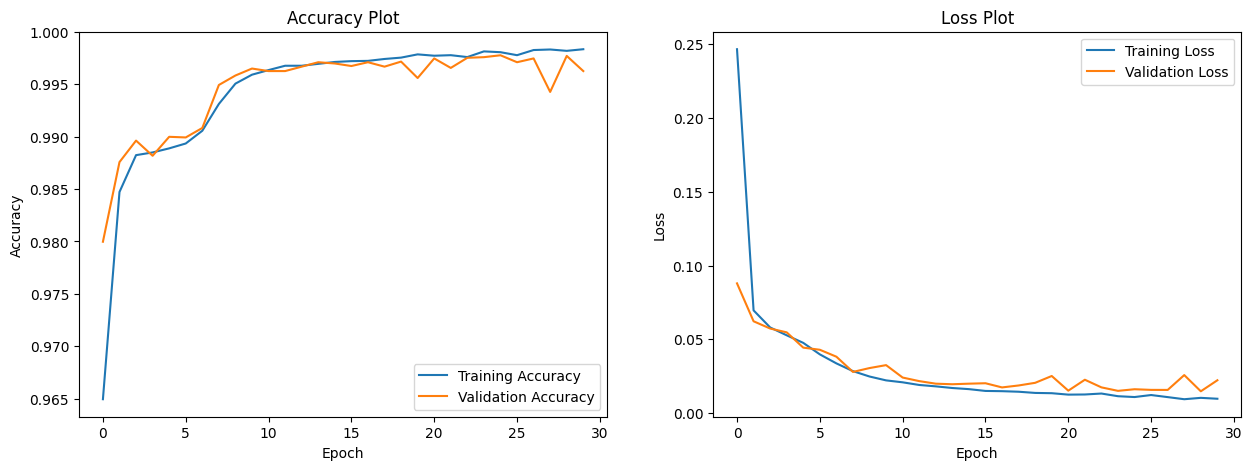

In [67]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(fitting.history['accuracy'], label='Training Accuracy')
plt.plot(fitting.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fitting.history['loss'], label='Training Loss')
plt.plot(fitting.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()